In [1]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'paysim_cleaned.csv'
path = '../Data/'

figpath = '../images/'

In [3]:
paysim = pd.read_csv(path+file)

In [4]:
paysim.shape

(6362620, 12)

In [5]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transType        object 
 2   amount           float64
 3   nameOrig         object 
 4   oldbalanceOrig   float64
 5   newbalanceOrig   float64
 6   nameDest         object 
 7   oldbalanceDest   float64
 8   newbalanceDest   float64
 9   isFraud          int64  
 10  diffBalanceOrig  float64
 11  diffBalanceDest  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 582.5+ MB


In [6]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0.0,11668.14


In [7]:
# Determine Null values
paysim.isnull().sum()

step               0
transType          0
amount             0
nameOrig           0
oldbalanceOrig     0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
diffBalanceOrig    0
diffBalanceDest    0
dtype: int64

In [8]:
print(format(paysim.transType.value_counts()),",")

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: transType, dtype: int64 ,


In [9]:
print(format(paysim.isFraud.value_counts()),",")

0    6354407
1       8213
Name: isFraud, dtype: int64 ,


In [10]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0.0,11668.14


In [11]:
paysim.transType.value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: transType, dtype: float64

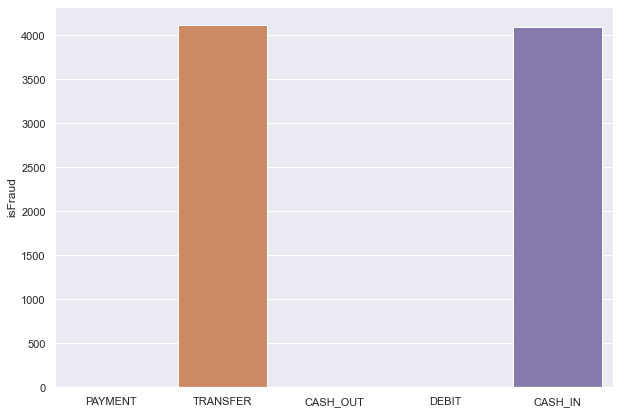

In [12]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(10,7))
sns.barplot(x=paysim.transType.unique(),y=paysim.groupby("transType")["isFraud"].sum())
plt.savefig(figpath + "figurebarplot.png") # save as png

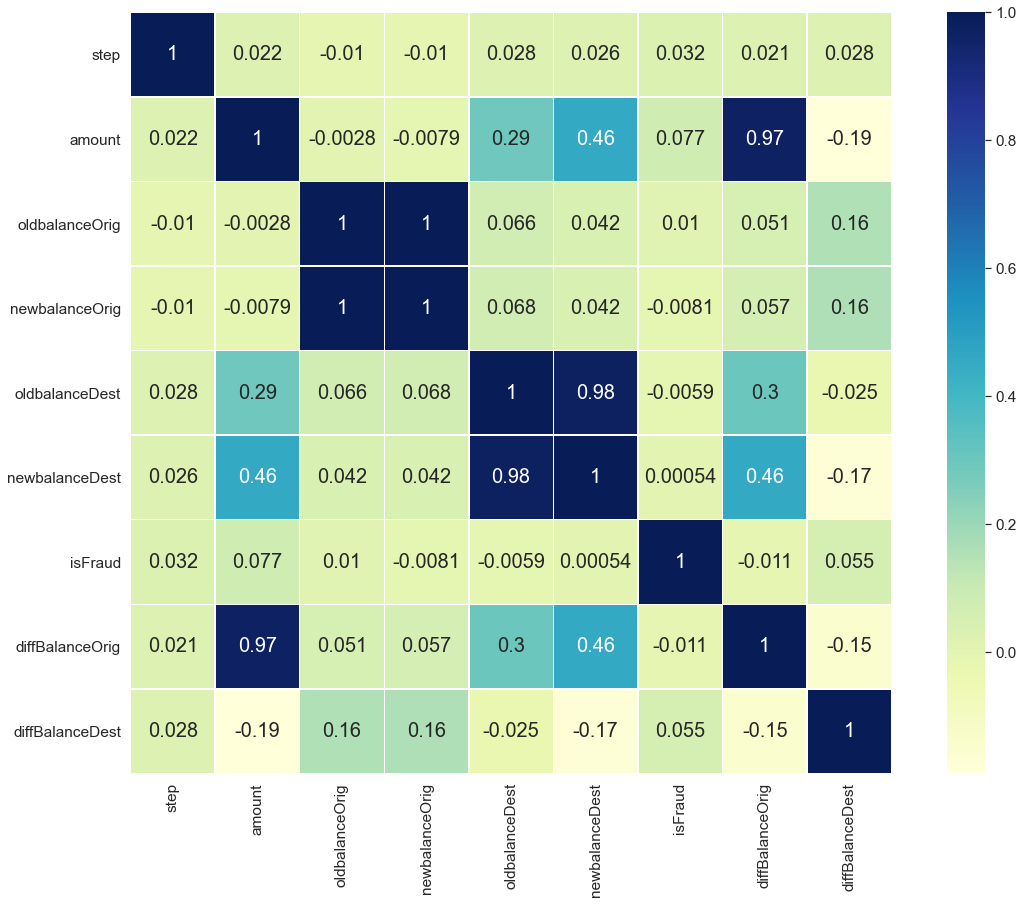

In [13]:
# Make a heatmap of the data
plt.figure(figsize=(20,14))
sns.set(font_scale = 1.4)
sns.heatmap(paysim.corr() ,annot=True, linewidths=.5, annot_kws={"size":20}, square=True, cmap='YlGnBu')
plt.savefig(figpath + "figureheatmap.png") # save as png

# Pre-Processing: 
 - Standardize Data
 - Upsample & Downsample

# Convert categorical variable into dummy/indicator variables

In [14]:
paysim = pd.get_dummies(paysim, drop_first=True)
paysim.head()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,transType_CASH_OUT,transType_DEBIT,transType_PAYMENT,transType_TRANSFER,nameDest_M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0,0,1,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,0,0,1,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,0,0,0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,1,0,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,0,0,1,0,1


In [15]:
paysim.shape

(6362620, 14)

In [16]:
# Display counts Fraud and Non Fruad
paysim.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
# Dummy Categorical variable Dataset to Disk
paysim.to_csv('../Data/paysim_cleaned_dummy.csv', index=False)

# Normalize Data:

In [18]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

cols_to_norm = ['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                'diffBalanceOrig', 'diffBalanceDest']

scaler = StandardScaler()
paysim_norm = scaler.fit_transform(paysim[cols_to_norm])

In [19]:
paysim_norm[0:1]

array([[-1.70304158, -0.28155992, -0.22981004, -0.2376217 , -0.3238139 ,
        -0.33341141, -0.33147998, -0.10356638]])

In [20]:
paysim.loc[:,(cols_to_norm)] = paysim_norm

In [21]:
paysim.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,7.860438e-13,1.000000,-1.703042,-0.614038,-0.030894,0.643585,3.510123
amount,6362620.0,1.500580e-15,1.000000,-0.297855,-0.275681,-0.173865,0.047792,152.793582
oldbalanceOrig,6362620.0,1.412742e-13,1.000000,-0.288716,-0.288716,-0.283797,-0.251561,20.341491
newbalanceOrig,6362620.0,2.711092e-13,1.000000,-0.292442,-0.292442,-0.292442,-0.243107,16.665226
oldbalanceDest,6362620.0,-5.038324e-13,1.000000,-0.323814,-0.323814,-0.284773,-0.046383,104.412006
newbalanceDest,6362620.0,-5.498931e-13,1.000000,-0.333411,-0.333411,-0.274986,-0.030779,96.609105
isFraud,6362620.0,1.290820e-03,0.035905,0.000000,0.000000,0.000000,0.000000,1.000000
diffBalanceOrig,6362620.0,-2.824619e-13,1.000000,-0.331480,-0.326610,-0.218273,0.080027,152.055323
diffBalanceDest,6362620.0,-1.955975e-13,1.000000,-171.996264,-0.125852,-0.117924,-0.059371,29.750423
transType_CASH_OUT,6362620.0,3.516633e-01,0.477490,0.000000,0.000000,0.000000,1.000000,1.000000


In [22]:
paysim.head()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,transType_CASH_OUT,transType_DEBIT,transType_PAYMENT,transType_TRANSFER,nameDest_M
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,-0.33148,-0.103566,0,0,1,0,1
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,-0.33148,-0.121629,0,0,1,0,1
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,-0.33148,-0.125442,0,0,0,1,0
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,-0.33148,-0.077468,1,0,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,-0.33148,-0.099425,0,0,1,0,1


In [23]:
# Dummy Categorical variable & Standard Scaler Dataset to Disk
paysim.to_csv('../Data/paysim_cleaned_dummy_StandardScaler.csv', index=False)